In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio

In [2]:
data_path = "results"

In [3]:
results_dfs = {
    "whisper_tiny": pd.read_parquet(os.path.join(data_path, "whisper_tiny_results_df.parquet")),
    "whisper_small": pd.read_parquet(os.path.join(data_path, "whisper_small_results_df.parquet")),
    # "whisper_base": pd.read_parquet(os.path.join(data_path, "whisper_base_results_df.parquet")),
    "whisper_medium": pd.read_parquet(os.path.join(data_path, "whisper_medium_results_df.parquet")),
    "whisper_large_v3": pd.read_parquet(os.path.join(data_path, "whisper_large-v3_results_df.parquet")),
    "dist_whisper_large_v3": pd.read_parquet(os.path.join(data_path, "primeline_distil_whisper_large_v3_german_results_df.parquet")),
    "whisperx_large_v3": pd.read_parquet(os.path.join(data_path, "whisperx_results_df.parquet")),
    "wav2vec": pd.read_parquet(os.path.join(data_path, "wav2vec_results_df.parquet")),
}

metrics_dfs = {
    "whisper_tiny": pd.read_parquet(os.path.join(data_path, "whisper_tiny_metrics_df.parquet")),
    "whisper_small": pd.read_parquet(os.path.join(data_path, "whisper_small_metrics_df.parquet")),
    # "whisper_base": pd.read_parquet(os.path.join(data_path, "whisper_base_metrics_df.parquet")),
    "whisper_medium": pd.read_parquet(os.path.join(data_path, "whisper_medium_metrics_df.parquet")),
    "whisper_large_v3": pd.read_parquet(os.path.join(data_path, "whisper_large-v3_metrics_df.parquet")),
    "dist_whisper_large_v3": pd.read_parquet(os.path.join(data_path, "primeline_distil_whisper_large_v3_german_metrics_df.parquet")),
    "whisperx_large_v3": pd.read_parquet(os.path.join(data_path, "whisperx_metrics_df.parquet")),
    "wav2vec": pd.read_parquet(os.path.join(data_path, "wav2vec_metrics_df.parquet")),
}

metrics_dfs = pd.DataFrame({
    "Model": list(metrics_dfs.keys()),
    "WER": [df["wer"].values[0] for df in metrics_dfs.values()],
    "CER": [df["cer"].values[0] for df in metrics_dfs.values()],
    "WIL": [df["wil"].values[0] for df in metrics_dfs.values()],
    "WIP": [df["wip"].values[0] for df in metrics_dfs.values()],
    "ED": [df["ed"].values[0] for df in metrics_dfs.values()],
    "mean_inference_time": [df["mean_inference_time"].values[0] for df in metrics_dfs.values()],
    "sum_inference_time": [df["sum_inference_time"].values[0] for df in metrics_dfs.values()],
})

data_df = pd.read_parquet(os.path.join(data_path, "yt_df_filtered.parquet"))

data_df.head(3)

video_id                                 video_path  \
0  u1upVtXcrdo  F:/BIG_FILES/AI_DATA/2024_STT\u1upVtXcrdo   
1  5EkeDBfYimI  F:/BIG_FILES/AI_DATA/2024_STT\5EkeDBfYimI   
2  FRuyzfNw-i8  F:/BIG_FILES/AI_DATA/2024_STT\FRuyzfNw-i8   

                                     video_url  \
0  https://www.youtube.com/watch?v=u1upVtXcrdo   
1  https://www.youtube.com/watch?v=5EkeDBfYimI   
2  https://www.youtube.com/watch?v=FRuyzfNw-i8   

                                        segment_path  \
0  F:/BIG_FILES/AI_DATA/2024_STT\u1upVtXcrdo\segm...   
1  F:/BIG_FILES/AI_DATA/2024_STT\5EkeDBfYimI\segm...   
2  F:/BIG_FILES/AI_DATA/2024_STT\FRuyzfNw-i8\segm...   

                                     transcript_path  segment_duration  \
0  F:/BIG_FILES/AI_DATA/2024_STT\u1upVtXcrdo\tran...            24.070   
1  F:/BIG_FILES/AI_DATA/2024_STT\5EkeDBfYimI\tran...            19.101   
2  F:/BIG_FILES/AI_DATA/2024_STT\FRuyzfNw-i8\tran...            20.360   

                                          transcript  num_words  
0  So sieht jetzt mein Make-up aus, ich bin jetzt...         41  
1  Ziel. Wie genau wir dahin kommen, ist mir egal...         54  
2  Das sind manchmal ganz verrückte Momente. Also...         79

In [4]:
# print some stats
print(f"Amount of data: {len(data_df)}")
print(f"Total length of audio: {data_df['segment_duration'].sum() / 3600:.2f} hours")
print(f"Total number of words: {data_df['num_words'].sum()}")

sample_audio = data_df.sample(1)
sample_transcript = sample_audio["transcript"].values[0]
sample_audio_path = sample_audio["segment_path"].values[0]
print(f"Sample transcript: {sample_transcript}")
display(Audio(sample_audio_path))

Amount of data: 11839
Total length of audio: 68.59 hours
Total number of words: 612397
Sample transcript: gestört, wenn mich Leute von der Seite angeguckt haben. Ich konnte es nicht aushalten. Mein ganzes Leben hat sich nur meine Nase gedreht. Als das erledigt war, war alles in Ordnung. Die hat mich wirklich glücklicher gemacht. Aber meine Brust-OP, die war dann für mich nur so: "Ach ja, alle machen das jetzt irgendwie und es sieht gut aus. Ach, da mache ich das jetzt auch mal, vielleicht bin ich dann mehr Frau." Und ich


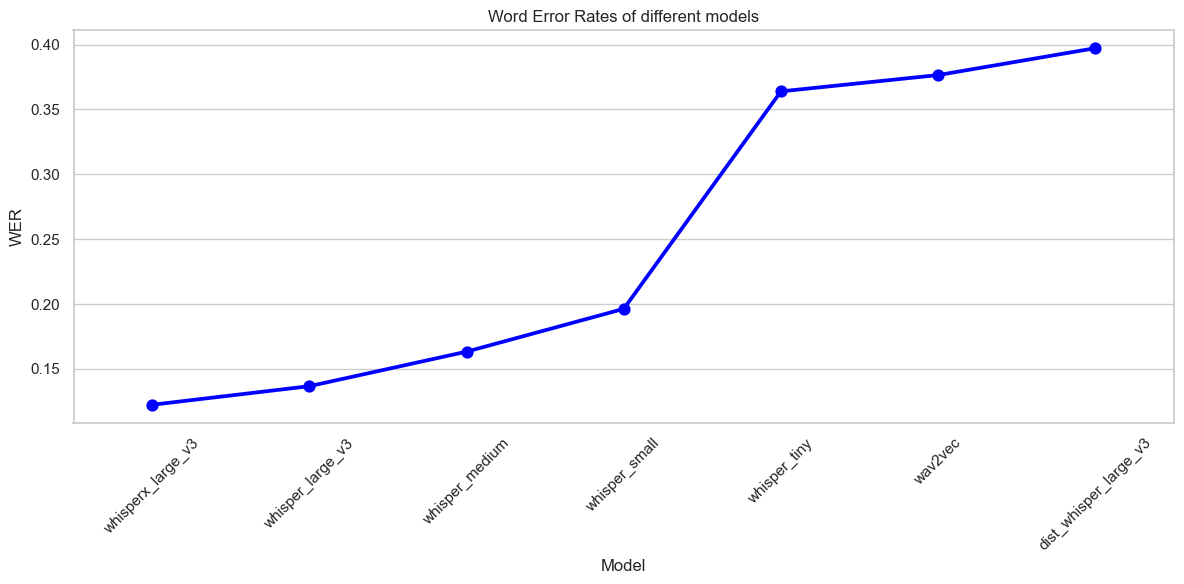

In [7]:
wers_df = metrics_dfs.sort_values("WER")

plt.figure(figsize=(12, 6)); sns.set_theme(style="whitegrid")
sns.pointplot(data=wers_df, x="Model", y="WER", color="blue")
plt.xticks(rotation=45)
plt.title("Word Error Rates of different models")
plt.tight_layout()
plt.show()

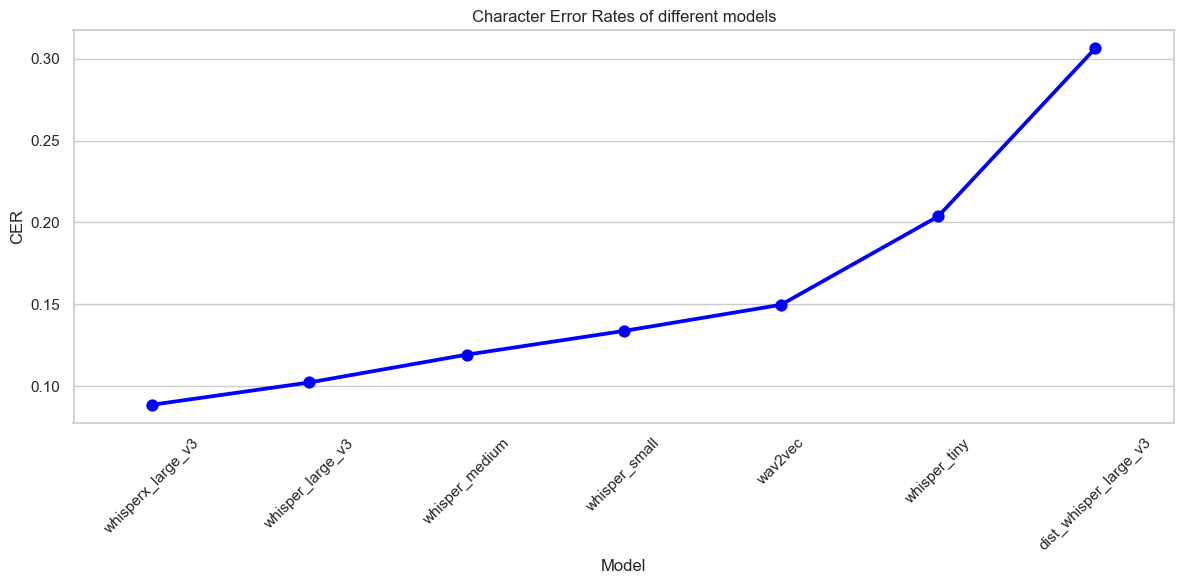

In [8]:
cers_df = metrics_dfs.sort_values("CER")

plt.figure(figsize=(12, 6)); sns.set_theme(style="whitegrid")
sns.pointplot(data=cers_df, x="Model", y="CER", color="blue")   
plt.xticks(rotation=45)
plt.title("Character Error Rates of different models")
plt.tight_layout()
plt.show()

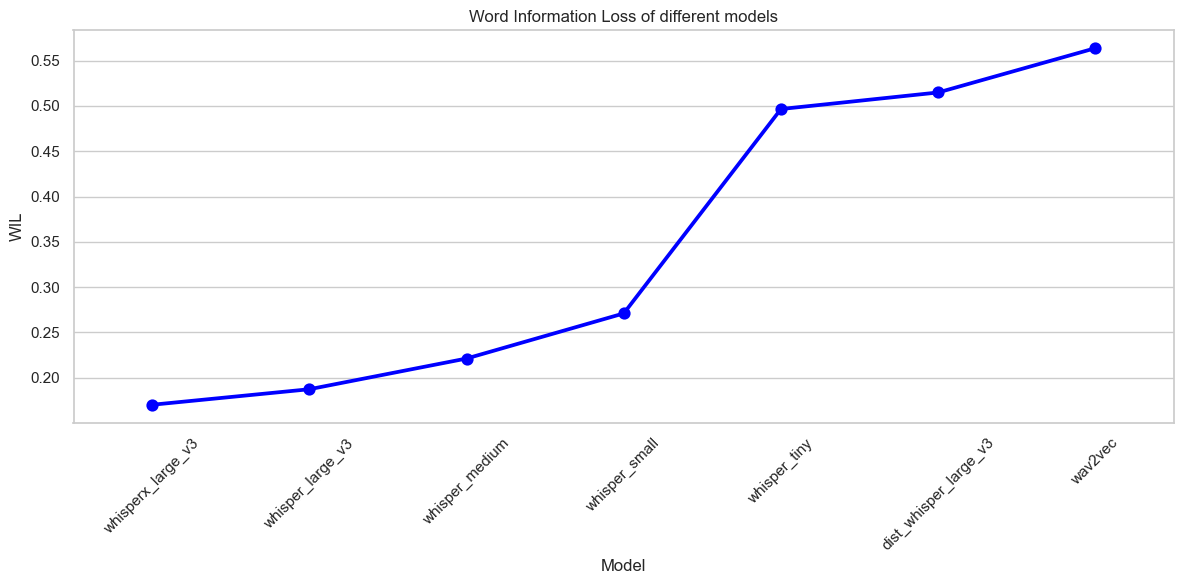

In [9]:
wils_df = metrics_dfs.sort_values("WIL")

plt.figure(figsize=(12, 6)); sns.set_theme(style="whitegrid")
sns.pointplot(data=wils_df, x="Model", y="WIL", color="blue")
plt.xticks(rotation=45)
plt.title("Word Information Loss of different models")
plt.tight_layout()
plt.show()

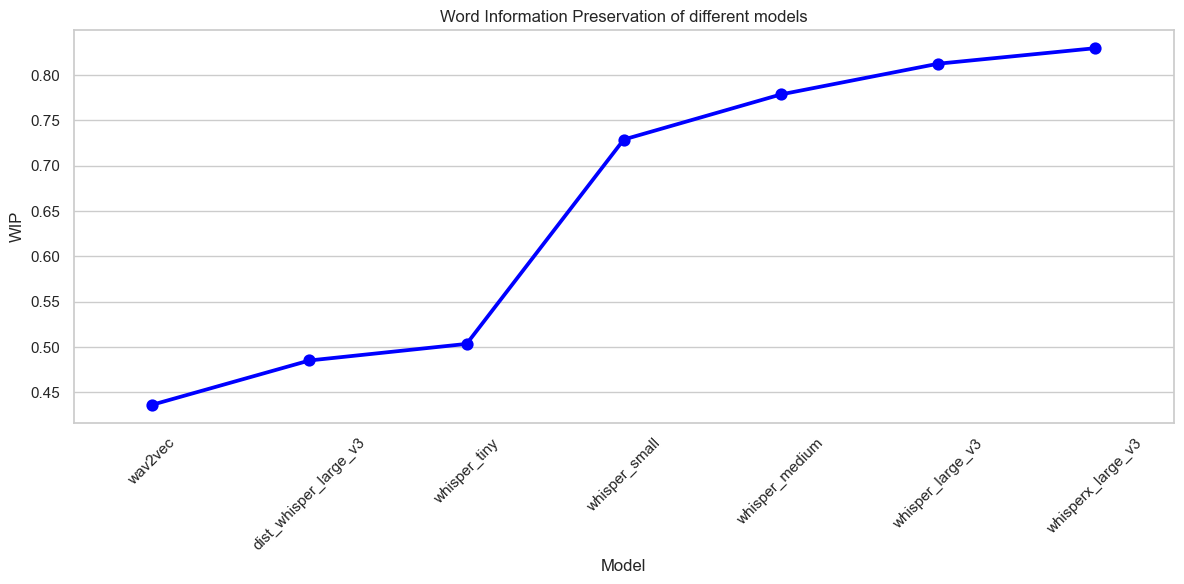

In [10]:
wips_df = metrics_dfs.sort_values("WIP")

plt.figure(figsize=(12, 6)); sns.set_theme(style="whitegrid")
sns.pointplot(data=wips_df, x="Model", y="WIP", color="blue")
plt.xticks(rotation=45)
plt.title("Word Information Preservation of different models")
plt.tight_layout()
plt.show()

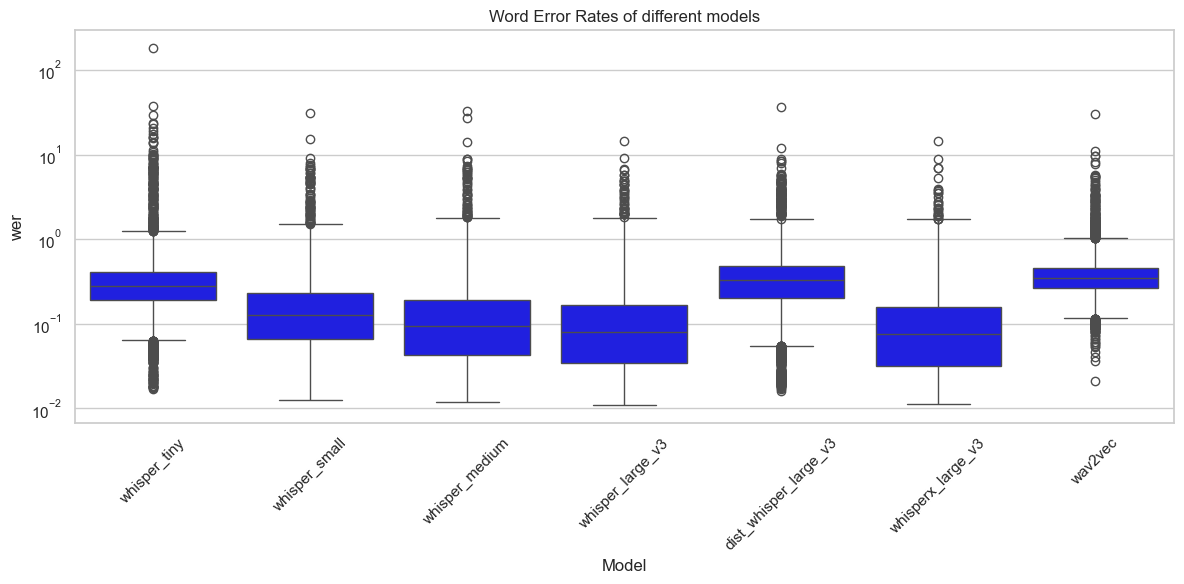

In [11]:
# Concatenate all WER values into a single array
wer_values = np.concatenate([df["wer"].values for df in results_dfs.values()])

# Create a DataFrame with flattened WER values
sample_wers_df = pd.DataFrame({
    "Model": np.repeat(list(results_dfs.keys()), [len(df) for df in results_dfs.values()]),
    "wer": wer_values,
})

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=sample_wers_df, x="Model", y="wer", color="blue", log_scale=True)
plt.xticks(rotation=45)
plt.title("Word Error Rates of different models")
plt.tight_layout()
plt.show()

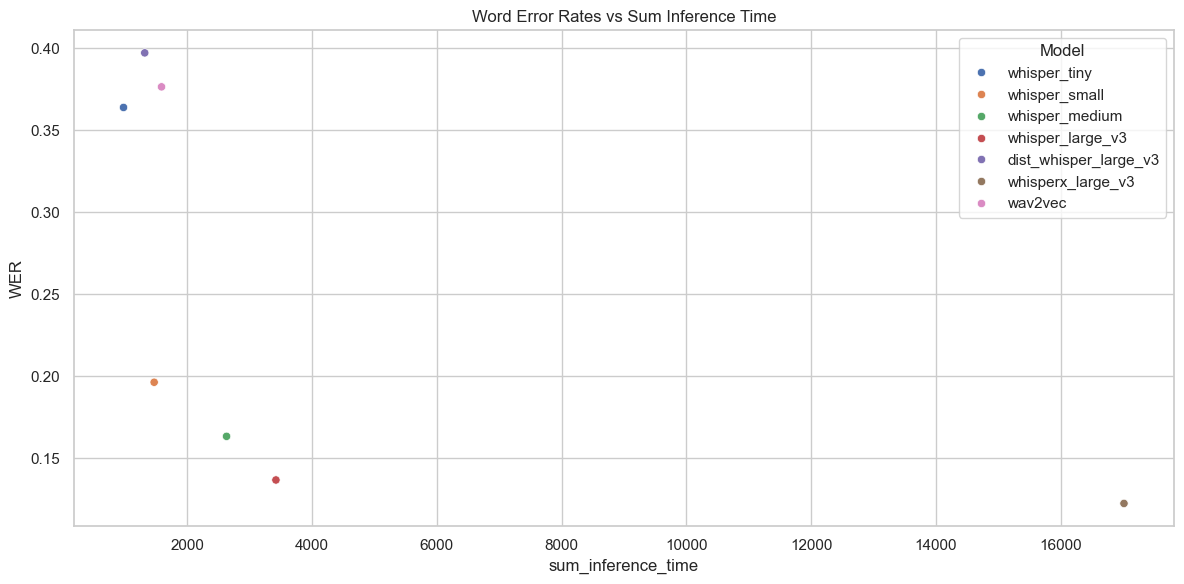

In [15]:
# plot wer vs mean inference time
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=metrics_dfs, x="sum_inference_time", y="WER", color="blue", hue="Model")
plt.title("Word Error Rates vs Sum Inference Time")
plt.tight_layout()
plt.show()

In [12]:
for model, df in results_dfs.items():
    best_sample = df.sort_values("wer").iloc[0]
    print(f"Best sample for {model}:")
    print("-" * 30)
    print(f"Audio path: {best_sample['audio_path']}")
    display(Audio(best_sample["audio_path"]))
    print("-" * 30)
    print(f"Ground truth:            {best_sample['gt']}")
    print(f"Prediction:              {best_sample['decoded_output']}")
    print("-" * 30)
    print(f"Normalized ground truth: {best_sample['normalized_gt']}")
    print(f"Normalized prediction:   {best_sample['normalized_decoded_output']}")
    print("-" * 30)
    print(f"WER: {best_sample['wer']}")
    print(); print(); print()

Best sample for whisper_tiny:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\2Go4Npf1hYU\segments\segment_02.mp3


------------------------------
Ground truth:            (Dramatische Musik)
Prediction:              Ich bin aus der Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-Mischin-
--

------------------------------
Ground truth:            (Dramatische Musik)
Prediction:              Wir sind am Herbst, am Sack, und der Porteiro war der Tag, der uns um uns gekommen ist. Er sagte, das ist ein Partner der Isabelle. Wir haben uns gespielt. Mein Vater sagte, er sollte nie wiederkommen. Das war ein sehr guter Platz.
------------------------------
Normalized ground truth: 
Normalized prediction:   wir sind am herbst am sack und der porteiro war der tag der uns um uns gekommen ist er sagte das ist ein partner der isabelle wir haben uns gespielt mein vater sagte er sollte nie wiederkommen das war ein sehr guter platz
------------------------------
WER: -1.0



Best sample for whisper_medium:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\v_BZFf-ttA0\segments\segment_14.mp3


------------------------------
Ground truth:            (Dramatische Musik)
Prediction:              Wir sind am Sábado in ihr Gebiet gekommen. Der Torhüter hat uns gesagt, wir seien die Eltern von Isabella. Wir haben gesungen. Mein Vater hat gesagt, dass sie nie wiederkommen sollte. Das hat mich sehr geholfen.
------------------------------
Normalized ground truth: 
Normalized prediction:   wir sind am s bado in ihr gebiet gekommen der torhueter hat uns gesagt wir seien die eltern von isabella wir haben gesungen mein vater hat gesagt dass sie nie wiederkommen sollte das hat mich sehr geholfen
------------------------------
WER: -1.0



Best sample for whisper_large_v3:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\siw5LYptzqE\segments\segment_12.mp3


------------------------------
Ground truth:            (Nachdenkliche Klänge)
Prediction:              an einem Ort, wo es sonst Gletscher hatte, nicht mehr gewesen ist. Und dann kommt man dort zurück, schlägt es einem schon aufs Gemüt, wenn man sieht, wie schnell sich das ändert, wie dramatisch sich das ändert. Und man weiss einfach, man kann es nicht aufhalten. Das schlägt schon teilweise aufs Gemüt, ja.
------------------------------
Normalized ground truth: 
Normalized prediction:   an einem ort wo es sonst gletscher hatte nicht mehr gewesen ist und dann kommt man dort zurueck schlaegt es einem schon aufs gemuet wenn man sieht wie schnell sich das aendert wie dramatisch sich das aendert und man weiss einfach man kann es nicht aufhalten das schlaegt schon teilweise aufs gemuet ja
------------------------------
WER: -1.0



Best sample for dist_whisper_large_v3:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\v_BZFf-ttA0\segments\segment_08.mp3


------------------------------
Ground truth:            (Unheilvolle Musik)
Prediction:              ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
------------------------------
Normalized ground truth: 
Normalized prediction:   
------------------------------
WER: -1.0



Best sample for whisperx_large_v3:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_ST

------------------------------
Ground truth:            (Ernste Musik) (Düstere Musik, heller Glockenton)
Prediction:              Outro
------------------------------
Normalized ground truth: 
Normalized prediction:   outro
------------------------------
WER: -1.0



Best sample for wav2vec:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\siw5LYptzqE\segments\segment_12.mp3


------------------------------
Ground truth:            (Nachdenkliche Klänge)
Prediction:              an einem an einem ort was sonst gletscher hater nicht mehr gewesen ist und dan komandol zurück schleigt seinem schon aufs gemüt wen man sieht wie wie schnel sich das ändert wie wie wie dramatisch sich das ender den wanmeiserwache man kans nicht aufhalten das ist schon sehr shleigt schon teilweise aufs gemüt an
------------------------------
Normalized ground truth: 
Normalized prediction:   an einem an einem ort was sonst gletscher hater nicht mehr gewesen ist und dan komandol zurueck schleigt seinem schon aufs gemuet wen man sieht wie wie schnel sich das aendert wie wie wie dramatisch sich das ender den wanmeiserwache man kans nicht aufhalten das ist schon sehr shleigt schon teilweise aufs gemuet an
------------------------------
WER: -1.0





In [11]:
for model, df in results_dfs.items():
    worst_sample = df.sort_values("wer").iloc[-1]
    print(f"Worst sample for {model}:")
    print("-" * 30)
    print(f"Audio path: {worst_sample['audio_path']}")
    display(Audio(worst_sample['audio_path']))
    print("-" * 30)
    print(f"Ground truth:            {worst_sample['gt']}")
    print(f"Prediction:              {worst_sample['decoded_output']}")
    print("-" * 30)
    print(f"Normalized ground truth: {worst_sample['normalized_gt']}")
    print(f"Normalized prediction:   {worst_sample['normalized_decoded_output']}")
    print("-" * 30)
    print(f"WER: {worst_sample['wer']}")
    print(); print(); print()

Worst sample for whisper_tiny:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\NlNK75eOmks\segments\segment_26.mp3


------------------------------
Ground truth:            Oder?
Prediction:              Oder? Ich habe die Kabette, die das in der Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von Ressentung von 

------------------------------
Ground truth:            Oder?
Prediction:              Ich habe hier ein Kaviert, das aus Russland ist, dass es in Russland gibt. Sobald solche Marken existieren, gibt es in Russland. Es gibt Rests. Wir müssen das russische Wachstum revisen.
------------------------------
Normalized ground truth: oder
Normalized prediction:   ich habe hier ein kaviert das aus russland ist dass es in russland gibt sobald solche marken existieren gibt es in russland es gibt rests wir muessen das russische wachstum revisen
------------------------------
WER: 31.0



Worst sample for whisper_medium:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\NlNK75eOmks\segments\segment_26.mp3


------------------------------
Ground truth:            Oder?
Prediction:              Ich würde noch ein Kaviar geben, dass es in der letzten Zeit etwas aus Russland war, aufgrund dessen, wie es jetzt in Russland existiert, Arresten gab. Wir müssen also die Rationale WIKI aufregen.
------------------------------
Normalized ground truth: oder
Normalized prediction:   ich wuerde noch ein kaviar geben dass es in der letzten zeit etwas aus russland war aufgrund dessen wie es jetzt in russland existiert arresten gab wir muessen also die rationale wiki aufregen
------------------------------
WER: 33.0



Worst sample for whisper_large_v3:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\o8IvGZu7YEE\segments\segment_13.mp3


------------------------------
Ground truth:            Wäre es nicht besser aufzugeben?
Prediction:              Sie meinen nicht, dass es nicht besser ist, aufzugeben? Aufgeben auf keinen Fall. Ich kann nicht konkret sagen, wie das dann abläuft. Dann knallt es da drin und vor allem mein Kumpel ist brandgefährlich. Und das Letzte ist dann diesen, ja, ich habe elf Jahre Knastweg, ich habe 13 gehabt. Ich war von Anfang an Erziehungshalber und so eine Scheiße und alles. Und ich scheiße auf mein Leben. Und das mache ich ganz im Ernst. Ja.
------------------------------
Normalized ground truth: waere es nicht besser aufzugeben
Normalized prediction:   sie meinen nicht dass es nicht besser ist aufzugeben aufgeben auf keinen fall ich kann nicht konkret sagen wie das dann ablaeuft dann knallt es da drin und vor allem mein kumpel ist brandgefaehrlich und das letzte ist dann diesen ja ich habe elf jahre knastweg ich habe dreizehn gehabt ich war von anfang an erziehungshalber und so eine scheiss

------------------------------
Ground truth:            Oder?
Prediction:              Ihr gehört eine Kaviar,,, dass es gibt,,, dass es ein rezent News kommen aus Rusa, according zu welcherlich solche,,, also auch seitdem auch existiert, dass in Riese, Inche, die haben auch Resslich ihre Resslich ihre Razzia.
------------------------------
Normalized ground truth: oder
Normalized prediction:   ihr gehoert eine kaviar  dass es gibt  dass es ein rezent news kommen aus rusa according zu welcherlich solche  also auch seitdem auch existiert dass in riese inche die haben auch resslich ihre resslich ihre razzia
------------------------------
WER: 36.0



Worst sample for wav2vec:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\NlNK75eOmks\segments\segment_26.mp3


------------------------------
Ground truth:            Oder?
Prediction:              oder aider kavietel da the hasben zam resent news kan auto rusher akolit wichakrsuch markex nau exist adrise rasha her bina wests h ähm the unmitehar tu revisen dat rational weakyon
------------------------------
Normalized ground truth: oder
Normalized prediction:   oder aider kavietel da the hasben zam resent news kan auto rusher akolit wichakrsuch markex nau exist adrise rasha her bina wests h aehm the unmitehar tu revisen dat rational weakyon
------------------------------
WER: 30.0





In [12]:
sample_id = results_dfs["whisper_tiny"].sample(1).index
for model, df in results_dfs.items():
    sample = df.loc[sample_id]
    print(f"Sample for {model}:")
    print("-" * 30)
    print(f"Audio path: {sample['audio_path'].values[0]}")
    display(Audio(sample['audio_path'].values[0]))
    print("-" * 30)
    print(f"Ground truth:            {sample['gt'].values[0]}")
    print(f"Prediction:              {sample['decoded_output'].values[0]}")
    print("-" * 30)
    print(f"Normalized ground truth: {sample['normalized_gt'].values[0]}")
    print(f"Normalized prediction:   {sample['normalized_decoded_output'].values[0]}")
    print("-" * 30)
    print(f"WER: {sample['wer'].values[0]}")
    print(); print(); print()

Sample for whisper_tiny:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\SFxRvohLtrk\segments\segment_09.mp3


------------------------------
Ground truth:            Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel: Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle. Auf
Prediction:              Die Startkinderbitter versorgen, dass mehr Leute arbeiten, indem er investiert. Ein einfaches Beispiel. Wenn der Start Geld einsetzt, vielleicht sogar Schulden macht, um eine Brümgebauen zu lassen, dann fließt Geld für das Material, Leute für den Geld mit der Planung und auf der Baustell.
------------------------------
Normalized ground truth: geld rein der staat kann aber dafuer sorgen dass mehr leute arbeit haben indem er investiert investiert man zum beispiel in eine funktionierende infrastrukt

------------------------------
Ground truth:            Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel: Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle. Auf
Prediction:              Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Ein einfaches Beispiel. Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle.
------------------------------
Normalized ground truth: geld rein der staat kann aber dafuer sorgen dass mehr leute arbeit haben indem er investiert investiert man zum beispiel in eine funktionierende in

------------------------------
Ground truth:            Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel: Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle. Auf
Prediction:              Der Staat kann dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel. Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle.
------------------------------
Normalized ground truth: geld rein der staat kann aber dafuer sorgen dass 

------------------------------
Ground truth:            Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel: Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle. Auf
Prediction:              Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Ein einfaches Beispiel. Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle.
------------------------------
Normalized ground truth: geld rein der staat kann aber dafuer sorgen dass mehr leute arbeit haben indem er investiert investiert man zum beispiel in eine funktio

------------------------------
Ground truth:            Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel: Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle. Auf
Prediction:              Dieser Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel Wenn der Staat Geld Geld Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen. Dann fliest Geld für das Material, dann fliesst Geld für das Material, Leute für das Material, Leute für das Material, Leute für das Material, Leute verdienen und auf der Planung u

------------------------------
Ground truth:            Geld rein. Der Staat kann aber dafür sorgen, dass mehr Leute Arbeit haben, indem er investiert. Investiert man zum Beispiel in eine funktionierende Infrastruktur, dann verpufft das ja nicht einfach. Ein einfaches Beispiel: Wenn der Staat Geld einsetzt, vielleicht sogar Schulden macht, um eine Brücke bauen zu lassen, dann fließt Geld für das Material, Leute verdienen Geld mit der Planung und auf der Baustelle. Auf
Prediction:              eld rein der stat kan aber dafür sorgen das mehr leute arbeit haben indem er investiert investiert man zum beispiel in eine funktionierende infrastruktur dan verpuft das ja nicht einfach ein einfaches beispiel wen der stat geld einsetzt vieleicht sogar schuldenmacht um eine brücke bauen zu lasen dan fliest geld für das material leute verdienen geld mit der planung und auf der baustele
------------------------------
Normalized ground truth: geld rein der staat kann aber dafuer sorgen dass mehr leut

In [13]:
# why is distil whisper so bad? lets look at examples
distil_whisper_df = results_dfs["dist_whisper_large_v3"]
distil_whisper_samples = distil_whisper_df.sample(5)
for idx, sample in distil_whisper_samples.iterrows():
    print(f"Sample {idx}:")
    print("-" * 30)
    print(f"Audio path: {sample['audio_path']}")
    display(Audio(sample['audio_path']))
    print("-" * 30)
    print(f"Ground truth:            {sample['gt']}")
    print(f"Prediction:              {sample['decoded_output']}")
    print("-" * 30)
    print(f"Normalized ground truth: {sample['normalized_gt']}")
    print(f"Normalized prediction:   {sample['normalized_decoded_output']}")
    print("-" * 30)
    print(f"WER: {sample['wer']}")
    print(); print(); print()

Sample 9809:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\TpD-tH9_DCw\segments\segment_02.mp3


------------------------------
Ground truth:            dass Katzen gefährlich sind. Weil das nur Panikmache ist von den Ratten. Und egal, wie viele Mäuse von anderen Katzen gefressen werden, diese Maus bliebe bei ihrer Überzeugung: Sie würde nicht lange leben! Und der Mensch? Forscher glauben, dass diese irrationale Seite von uns einen evolutionären Vorteil gehabt haben muss.
Prediction:              denkatzengefährlich sind, weil das nur Panikmache ist von den Ratten und egal, wie viele Mäuse von anderen Katzen gefressen werden. Diese Masse bliebe bei ihrer Überzeugung, sie würde nicht lange leben. Und der Mensch Forscher glauben, dass diese sehr irrationale Seite von uns, einen evolutionären Vorteil gehabt haben muss.
------------------------------
Normalized ground truth: dass katzen gefaehrlich sind weil das nur panikmache ist von den ratten und egal wie viele maeuse von anderen katzen gefressen werden diese maus bliebe bei ihrer ueberzeugung sie wuerde nicht lange leben und der m

------------------------------
Ground truth:            ein Abwägen. Unterm Strich ist es ist mir wichtig, dass möglichst viele Menschen Bock auf unsere Videos haben.  Was ich aber auch sagen muss: Ich habe in den Videos der letzten Wochen schon bewusst vermieden, zu gendern, habe es aber nicht explizit angekündigt. Es sind danach kaum Kommentare am Start gewesen, die gesagt haben: Geil, er hat nicht gegendert.  Anyway: Sollte mir in Zukunft doch noch ein Genderer rausrutschen, seht es mir nach, das kann passieren.
Prediction:              Und am Strich ist es mir wichtig, dass möglichst viele Menschen Bock auf unsere Videos haben. Was ich aber auch sagen muss, ich habe in den Videos der letzten Wochen schon bewusst vermieden zu genern, hab's aber nicht explizit angekündigt. Es kamen danach kaum Kommentare, die gesagt haben, die gesagt haben, geil, er hat nicht gegendere. Eine geht es sollte doch noch ein Gendere.
------------------------------
Normalized ground truth: ein abwaegen unt

------------------------------
Ground truth:            Dabei kommt es bei den Regeln ja auf die Aktivität und die Anzahl der Personen an. Gerade beim Singen muss man vorsichtig sein. Eine Studie legt zum Beispiel nahe, dass währenddessen Tröpfchen und ansteckende Aerosole besonders weite Distanzen zurücklegen und Menschen anstecken können. Der Vergleich hinkt und framt die Corona-Maßnahmen wiederum als Irrsinn.
Prediction:              Dabei kommt es bei den Regeln ja auf die Aktivität und die Anzahl der Personen an. Gerade beim Singen muss man vorsichtig sein. Eine Studie legt zum Beispiel nahe, dass während dessen Tröpfchen und anstecken können. Der Vergleich hinkt und franzen anstecken können. Der Vergleich hinkt und framt die Coronama-Massnahmen wiederum als Irsinn.
------------------------------
Normalized ground truth: dabei kommt es bei den regeln ja auf die aktivitaet und die anzahl der personen an gerade beim singen muss man vorsichtig sein eine studie legt zum beispiel nahe 

------------------------------
Ground truth:            längst behoben. Aber Leute und Organisationen updaten ihre Software nun mal nicht. So infiziert WannaCry in kürzester Zeit insgesamt rund 230.000 Computer in 150 Ländern. Zu den Betroffenen zählen unter anderem die Deutsche Bahn,
Prediction:              denkst behoben, aber Leute und Organisationen abdaten ihre Software nun mal nicht. Und so infiziert Wone Cray in kürzester Zeit insgesamt rund zweihundertdreissigtausend Computer in einhundertfünfzig Ländern. Zu den Betroffenen zählen unter anderem die deutsche Bahn
------------------------------
Normalized ground truth: laengst behoben aber leute und organisationen updaten ihre software nun mal nicht so infiziert wannacry in kuerzester zeit insgesamt rund 230 000 computer in einhundertfuenfzig laendern zu den betroffenen zaehlen unter anderem die deutsche bahn
Normalized prediction:   denkst behoben aber leute und organisationen abdaten ihre software nun mal nicht und so infizier

------------------------------
Ground truth:            . Freunde der Sonne. Letzte Woche wurde ein YouTube-Video gedroppt. Und wenn es so etwas gäbe wie Sience-YouTube, wäre das auf Platz 1 der Trends.
Prediction:              Freunde der Sonne letzte Woche wurde ein YouTube-Video gedropt, und wenn es so was gäbe wie Science YouTube, dann wäre es auf Platz eins der Trends. Tochterrens. To Beautiful, kamen kleinen kleinen kleinen kleinen kleinen, kamenkriechen in zuvor.
------------------------------
Normalized ground truth: freunde der sonne letzte woche wurde ein youtube video gedroppt und wenn es so etwas gaebe wie sience youtube waere das auf platz eins der trends
Normalized prediction:   freunde der sonne letzte woche wurde ein youtube video gedropt und wenn es so was gaebe wie science youtube dann waere es auf platz eins der trends tochterrens to beautiful kamen kleinen kleinen kleinen kleinen kleinen kamenkriechen in zuvor
------------------------------
WER: 0.6538461446762085

